**Comprehensive Project Roadmap: Stock Price Prediction Using LSTM and GRU**

---

### **1. Data Collection**
- **Market Index Selection**: Choose a specific index (e.g., Nifty 50, S&P 500, FTSE 100).
- **Historical Price Data Sources**:
  - Yahoo Finance
  - Alpha Vantage API
  - NSE/BSE websites
  - Quandl or similar sources

### **2. Data Preprocessing**
- **Cleaning the Dataset**:
  - Handle missing values using imputation techniques or drop rows/columns if necessary.
  - Remove redundant or unnecessary columns (e.g., ticker names if constant).
- **Scaling**:
  - Normalize data using Min-Max Scaler or StandardScaler.
- **Sequence Creation**:
  - Convert data into time-series sequences for model training.

### **3. Feature Engineering**
- **Technical Indicators**:
  - **Trend Indicators**:
    - Moving Averages (Simple and Exponential)
    - MACD (Moving Average Convergence Divergence)
  - **Momentum Indicators**:
    - Relative Strength Index (RSI)
    - Stochastic Oscillator
  - **Volatility Indicators**:
    - Bollinger Bands
    - Average True Range (ATR)
  - **Volume Indicators**:
    - On-Balance Volume (OBV)
- **Custom Features**:
  - Lagged values of prices
  - Moving average crossover signals

### **4. Data Preparation**
- **Train-Test Split**:
  - Typical split: 80% training, 20% testing.
- **Sequence and Target Creation**:
  - Input: Sliding window of time-series data (e.g., last 10 days' prices).
  - Target: Next day's price or movement.

### **5. Model Architecture**
- **LSTM Model**:
  - **Input Layer**: Time-series sequences.
  - **Hidden Layers**:
    - Multiple stacked LSTM layers.
    - Dropout layers for regularization.
  - **Output Layer**: Dense layer predicting price or price movement.
- **GRU Model**:
  - Similar architecture to LSTM, with GRU layers replacing LSTMs.
- **Key Hyperparameters**:
  - Learning rate
  - Number of neurons per layer
  - Batch size

### **6. Model Training**
- **Compile Models**:
  - Loss Function: Mean Squared Error (MSE).
  - Optimizer: Adam or RMSprop.
- **Training Process**:
  - Train models on the training dataset.
  - Use a validation set for early stopping and tuning.

### **7. Model Evaluation**
- **Performance Metrics**:
  - Root Mean Square Error (RMSE)
  - Mean Absolute Error (MAE)
  - Mean Absolute Percentage Error (MAPE)
- **Visualization**:
  - Plot predicted vs actual prices.
  - Examine residuals.

### **8. Prediction Pipeline**
- **Prediction Function**:
  - Predict next day's price using trained models.
- **Rolling Predictions**:
  - Use previous predictions as inputs for subsequent predictions.
- **Real-Time Data Integration**:
  - Implement functionality for live data streaming.

### **9. Advanced Techniques**
- **Ensemble Methods**:
  - Combine LSTM and GRU predictions for improved accuracy.
- **Attention Mechanisms**:
  - Integrate attention layers to focus on key time steps.
- **Cross-Validation**:
  - Use time-series cross-validation for robustness.

### **10. Deployment Considerations**
- **Model Saving**:
  - Save trained models using joblib, pickle, or TensorFlow's SavedModel format.
- **Prediction API**:
  - Build a REST API using Flask/Django/FastAPI.
- **Monitoring System**:
  - Set up dashboards to monitor prediction accuracy.
- **Real-Time Streaming**:
  - Use Kafka or AWS Kinesis for real-time data ingestion.

### **11. Technology Stack**
- **Languages and Tools**:
  - Python
  - Pandas, NumPy (Data Handling)
  - Scikit-learn (Preprocessing and Evaluation)
  - TensorFlow/Keras (Model Building)
  - Matplotlib/Seaborn (Visualization)
  - yfinance (Data Collection)

### **12. Potential Challenges**
- **Overfitting**:
  - Regularize with Dropout and L2.
- **Market Volatility**:
  - Model sensitivity to extreme events.
- **Computational Complexity**:
  - Optimize sequence length and batch size.
- **Limited Predictive Power**:
  - Use external data sources for better context (e.g., news sentiment).

### **13. Recommended Workflow**
- Start simple with basic LSTM/GRU models.
- Gradually add features like technical indicators.
- Continuously validate and refine models.
- Document code and results extensively.

### **14. Ethical and Legal Considerations**
- Include a disclaimer about prediction limitations.
- Avoid making direct financial recommendations.
- Educate users on inherent market risks.

### **15. Suggested Development Approach**
- **Iterative Development**:
  - Build incrementally with regular validation.
- **Modular Structure**:
  - Use separate modules for data preprocessing, feature engineering, modeling, and evaluation.
- **Performance Tracking**:
  - Maintain logs of experiments for reproducibility.



In [2]:
!pip install yfinance --upgrade --no-cache-dir


In [4]:
import yfinance as yf

# Define the ticker symbol and date range
ticker = "^NSEI"  # Replace with the index you want (e.g., '^GSPC' for S&P 500)
start_date = "2014-01-01"
end_date = "2024-12-31"

# Fetch historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the dataset
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2014-01-02,6221.149902,6358.299805,6211.299805,6301.250000,158100
2014-01-03,6211.149902,6221.700195,6171.250000,6194.549805,139000
2014-01-06,6191.450195,6224.700195,6170.250000,6220.850098,118300
2014-01-07,6162.250000,6221.500000,6144.750000,6203.899902,138600
2014-01-08,6174.600098,6192.100098,6160.350098,6178.049805,146900


#data handling


In [7]:
# Check for missing values
data.isnull().sum()

# Drop rows with missing values or fill with forward fill method
data = data.fillna(method='ffill')  # Forward fill, or you can drop rows with .dropna()


C:\Users\prana\AppData\Local\Temp\ipykernel_33208\1616478577.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Forward fill, or you can drop rows with .dropna()


In [9]:
# Display all columns to confirm the column names
print(data.columns)


MultiIndex([( 'Close', '^NSEI'),
            (  'High', '^NSEI'),
            (   'Low', '^NSEI'),
            (  'Open', '^NSEI'),
            ('Volume', '^NSEI')],
           names=['Price', 'Ticker'])


In [11]:
# Flatten the multi-level column index
data.columns = data.columns.get_level_values(0)

# Now, you can access columns like 'Close', 'High', etc.
data.head()


Price,Close,High,Low,Open,Volume
Date,,,,,
2014-01-02,6221.149902,6358.299805,6211.299805,6301.250000,158100
2014-01-03,6211.149902,6221.700195,6171.250000,6194.549805,139000
2014-01-06,6191.450195,6224.700195,6170.250000,6220.850098,118300
2014-01-07,6162.250000,6221.500000,6144.750000,6203.899902,138600
2014-01-08,6174.600098,6192.100098,6160.350098,6178.049805,146900


In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Select the 'Price' columns (now accessible directly)
scaled_data = scaler.fit_transform(data[['Close', 'High', 'Low', 'Open', 'Volume']])

# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=['Close', 'High', 'Low', 'Open', 'Volume'])

# Optionally, replace the original columns with scaled ones
data[['Close', 'High', 'Low', 'Open', 'Volume']] = scaled_data_df


In [15]:
import numpy as np

# Function to create sequences for time-series modeling
def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Create sequences (e.g., 10-day window for prediction of the next day's price)
window_size = 10
X, y = create_sequences(scaled_data, window_size)

# Split the data into training and testing sets (80-20 split)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


#Model Architecture

## LSTM Model Architecture


In [19]:
!pip install tensorflow


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout


In [23]:
# Define the LSTM model
model = Sequential()

# LSTM layer (using 50 neurons and a 10-day window)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout for regularization

# Add another LSTM layer
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Fully connected (Dense) layer for output
model.add(Dense(units=1))  # Predict the next day's closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0149 - val_loss: 0.0575
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0066 - val_loss: 0.0578
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0062 - val_loss: 0.0574
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - val_loss: 0.0574
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0060 - val_loss: 0.0586
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - val_loss: 0.0590
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0063 - val_loss: 0.0575
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0059 - val_loss: 0.0577
Epoch 9/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0058 - val_loss: 0.0575
Epoch 10/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - val_loss: 0.0574
Epoch 11/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0062 - val_loss: 0.0582
Epoch 12/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - val_

In [27]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0429
Test Loss: 0.057714421302080154


In [29]:
# Assuming your model is already trained and is named 'model'

# Make predictions
predictions = model.predict(X_test)

# Now, print the shapes
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"Predictions shape: {predictions.shape}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
X_test shape: (538, 10, 5)
y_test shape: (538, 5)
Predictions shape: (538, 1)


In [49]:
# If y_test is already 1D, no need to slice it further
print(f"Original y_test shape: {y_test.shape}")

# If y_test is a 1D array, you can just use it as is
# (you don't need to index it as if it's 2D)

# Proceed with the rest of your code


Original y_test shape: (538, 5)


In [51]:
# Ensure y_test has the same size as predictions
y_test = y_test[:predictions.shape[0]]  # Aligning y_test with predictions

# Prepare an array aligned in shape for inverse scaling
n_features = 4  # The number of features for the original scaled data
predictions_input = np.concatenate((predictions.reshape(-1, 1), np.zeros((predictions.shape[0], n_features - 1))), axis=1)
y_test_input = np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], n_features - 1))), axis=1)

# Perform inverse scaling
predictions_rescaled = scaler.inverse_transform(predictions_input)[:, 0]
y_test_rescaled = scaler.inverse_transform(y_test_input)[:, 0]

# Prepare the results in a DataFrame
results_df = pd.DataFrame({
    'Actual Price': y_test_rescaled,
    'Predicted Price': predictions_rescaled
})

# Show the first few rows of the results
print(results_df.head())

# Optionally, save to a CSV
results_df.to_csv('predictions_vs_actual.csv', index=False)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2690 and the array at index 1 has size 538

In [53]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.plot(results_df['Actual Price'], color='blue', label='Actual Price')
plt.plot(results_df['Predicted Price'], color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


NameError: name 'results_df' is not defined

<Figure size 1000x600 with 0 Axes>

In [24]:
# Assuming you used a MinMaxScaler for the features and your model was trained on scaled data

# Inverse transform predictions
predictions_rescaled = scaler.inverse_transform(np.concatenate((predictions.reshape(-1, 1), np.zeros((predictions.shape[0], 4))), axis=1))[:, 0]

# Inverse transform actual values (y_test)
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4))), axis=1))[:, 0]

# Now, you can check the actual vs predicted values
print(f"Predicted Prices (rescaled): {predictions_rescaled[:5]}")
print(f"Actual Prices (rescaled): {y_test_rescaled[:5]}")


Predicted Prices (rescaled): [15247.73934866 15263.28880109 15302.63234975 15367.32132513
 15425.08624562]
Actual Prices (rescaled): [17730.75       17656.34960938 17736.94921875 17786.80078125
 18012.19921875]


In [31]:
# Example: Increase the number of units or epochs
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0167
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0063
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0060
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0060
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0055
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0061
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0057
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0057
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0057
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0057
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0061
Epoch 13/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0059
Epoch 14/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0057
Epoch 15/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0055
E

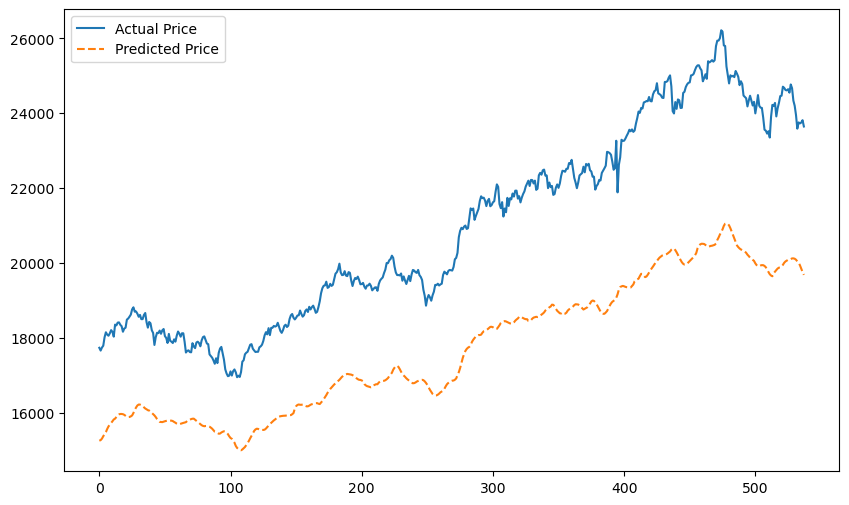

In [33]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Price')
plt.plot(predictions_rescaled, label='Predicted Price', linestyle='--')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 3212.6555731798744
Root Mean Squared Error (RMSE): 3331.457264877303


In [35]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)  # Ensure all features and target are scaled together


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


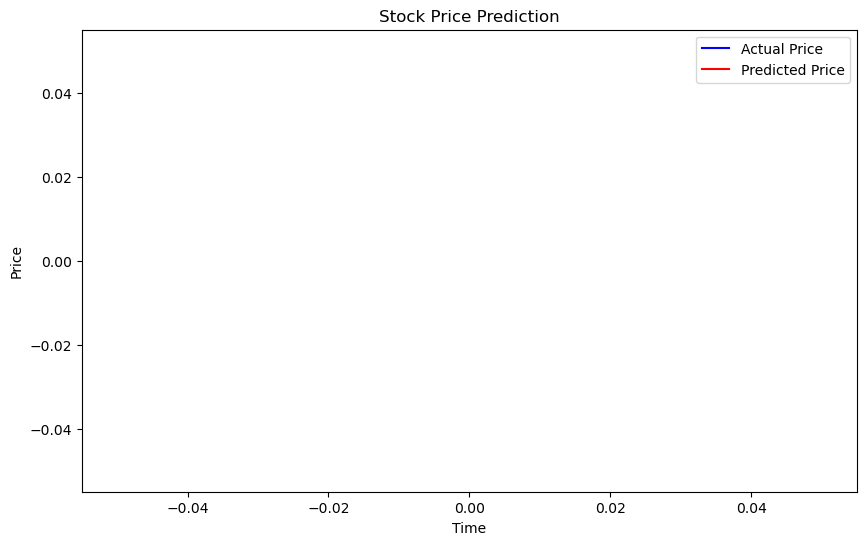

In [36]:
# Assuming predictions and y_test are correctly aligned
predictions_rescaled = scaler.inverse_transform(np.concatenate((predictions.reshape(-1, 1), np.zeros((predictions.shape[0], 4))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4))), axis=1))[:, 0]

# Plot predictions vs actual values
plt.figure(figsize=(10,6))
plt.plot(y_test_rescaled, color='blue', label='Actual Price')
plt.plot(predictions_rescaled, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


## REFINED LSTM

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop, lr_scheduler],
    verbose=1
)

# Evaluate the model
predictions = model.predict(X_test)


Epoch 1/200


C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0101 - val_loss: 0.0207 - learning_rate: 0.0010
Epoch 2/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0020 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 3/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0022 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 4/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0020 - val_loss: 0.0202 - learning_rate: 0.0010
Epoch 5/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0023 - val_loss: 0.0203 - learning_rate: 0.0010
Epoch 6/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0023 - val_loss: 0.0201 - learning_rate: 0.0010
Epoch 7/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0021 - val_loss: 0.0201 - learning_rate: 0.0010
Epoch 8/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0020 - val_loss: 0.0202 - learning_rate: 5.0000e-04
Epoch 9/200
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022 - val_loss: 0.0202 - learning_rate: 5.0000e-04
Epoch 10/200
5

In [39]:
sequence_length = 20  # Adjust this based on experimentation


In [40]:
ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)


In [41]:
# Make predictions on the test data
predictions_rescaled = model.predict(X_test)

# Inverse scale the predictions and actual values
predictions_rescaled = scaler.inverse_transform(np.concatenate((predictions_rescaled.reshape(-1, 1), np.zeros((predictions_rescaled.shape[0], 4))), axis=1))[:, 0]
y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], 4))), axis=1))[:, 0]

# Calculate MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


ValueError: Input contains NaN.

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)  # Ensure all features and target are scaled together


C:\Users\prana\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\prana\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))
